In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("blood.csv")
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


CHECK FOR MISSING VALUES

In [6]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

df EXPLORATION


In [7]:
#distribution of numerical features and categorical features
numerical_features =df.select_dtypes(include=[  'int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=[ 'object']).columns.tolist()



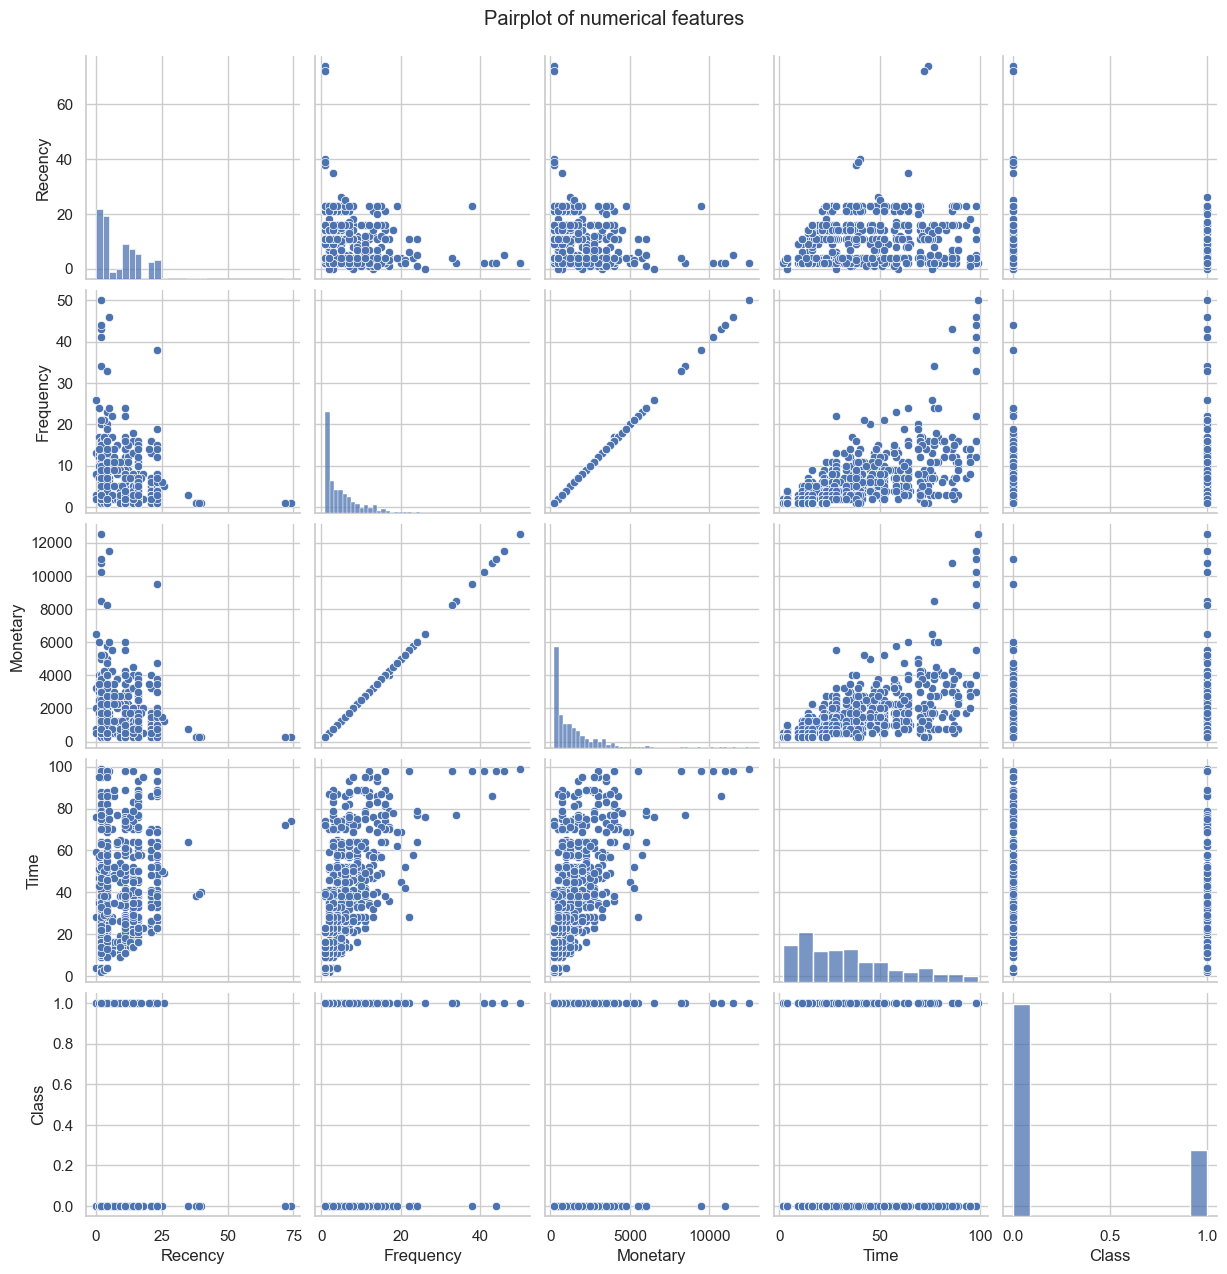

In [8]:
#pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of numerical features",y=1.02)
plt.show()

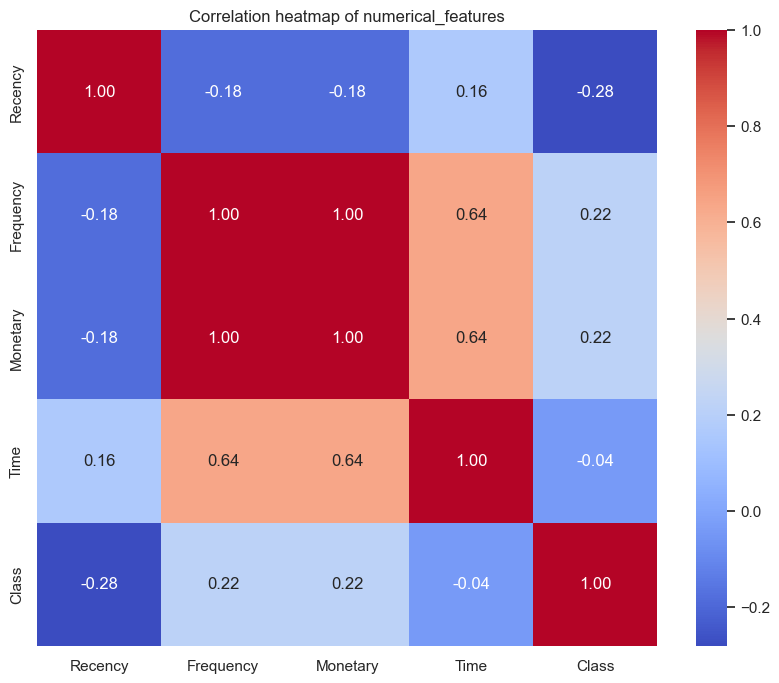

In [9]:
#correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix=df[numerical_features].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatmap of numerical_features")
plt.show()


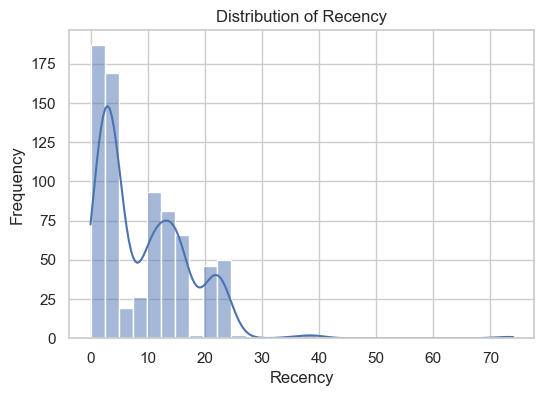

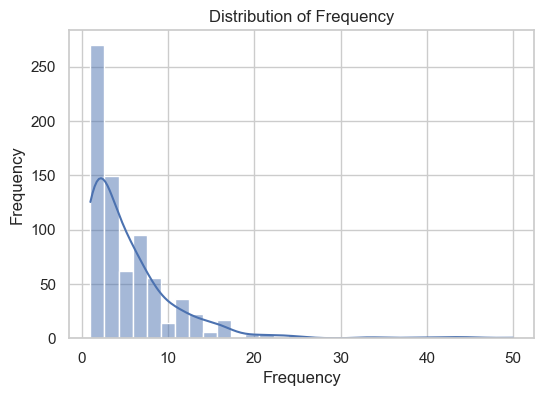

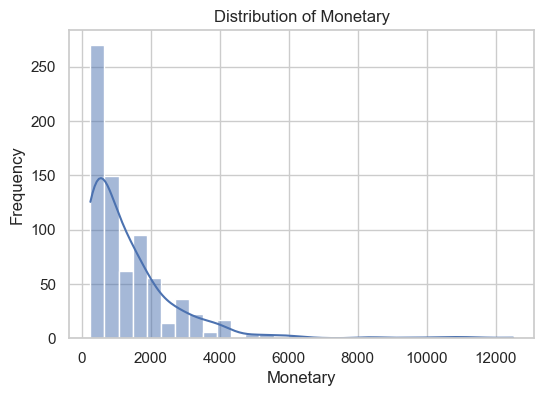

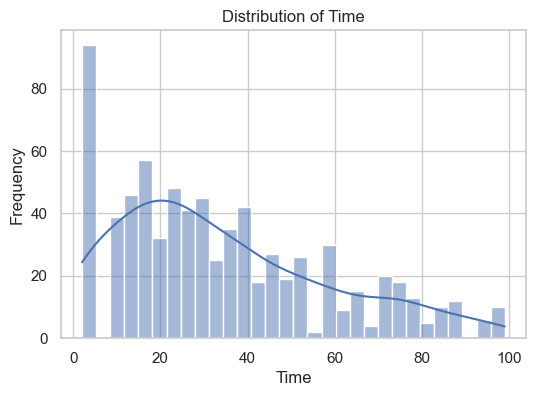

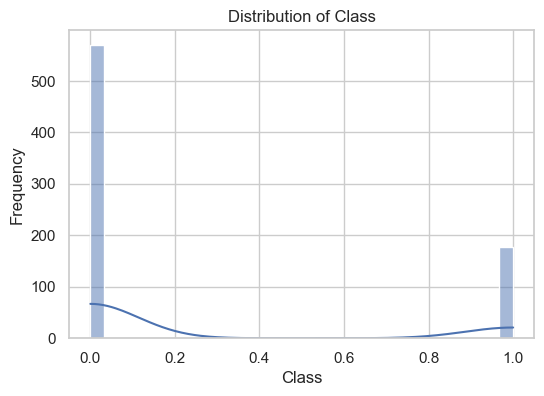

In [10]:
# Distribution plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [11]:
# Check if 'recommendation' exists in the dfset
if 'recommendation' not in df.columns:
    print("Column 'recommendation' not found. Creating a mock column for testing.")
    df['recommendation'] = np.random.choice([0, 1, 2, 3], size=len(df))

# Separate features (X) and target (y)
X = df.drop('recommendation', axis=1)
y = df['recommendation']


Column 'recommendation' not found. Creating a mock column for testing.


In [12]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class', 'recommendation'], dtype='object')

In [13]:

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [14]:

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])


In [15]:
# Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [16]:
# Step 4: Data Preprocessing
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

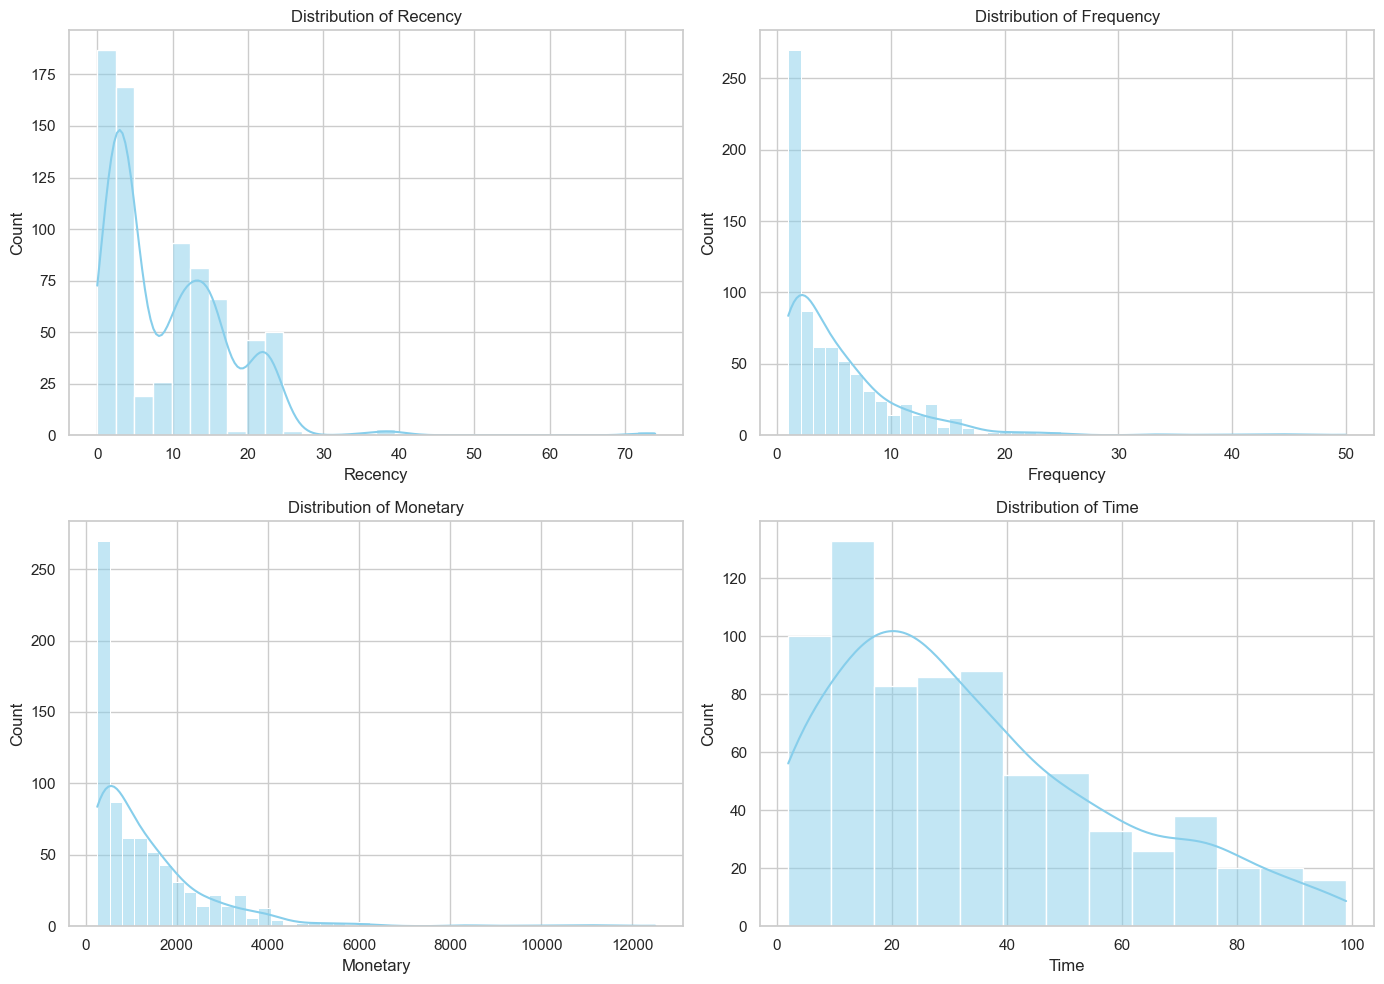

C:\Users\nst\AppData\Local\Temp\ipykernel_4960\2838046417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Class", y=columns[i], ax=ax, palette="Set2")
C:\Users\nst\AppData\Local\Temp\ipykernel_4960\2838046417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Class", y=columns[i], ax=ax, palette="Set2")
C:\Users\nst\AppData\Local\Temp\ipykernel_4960\2838046417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Class", y=columns[i], ax=ax, palette="Set2")
C:\Users\nst\AppData\Local\Temp\ipykernel_4

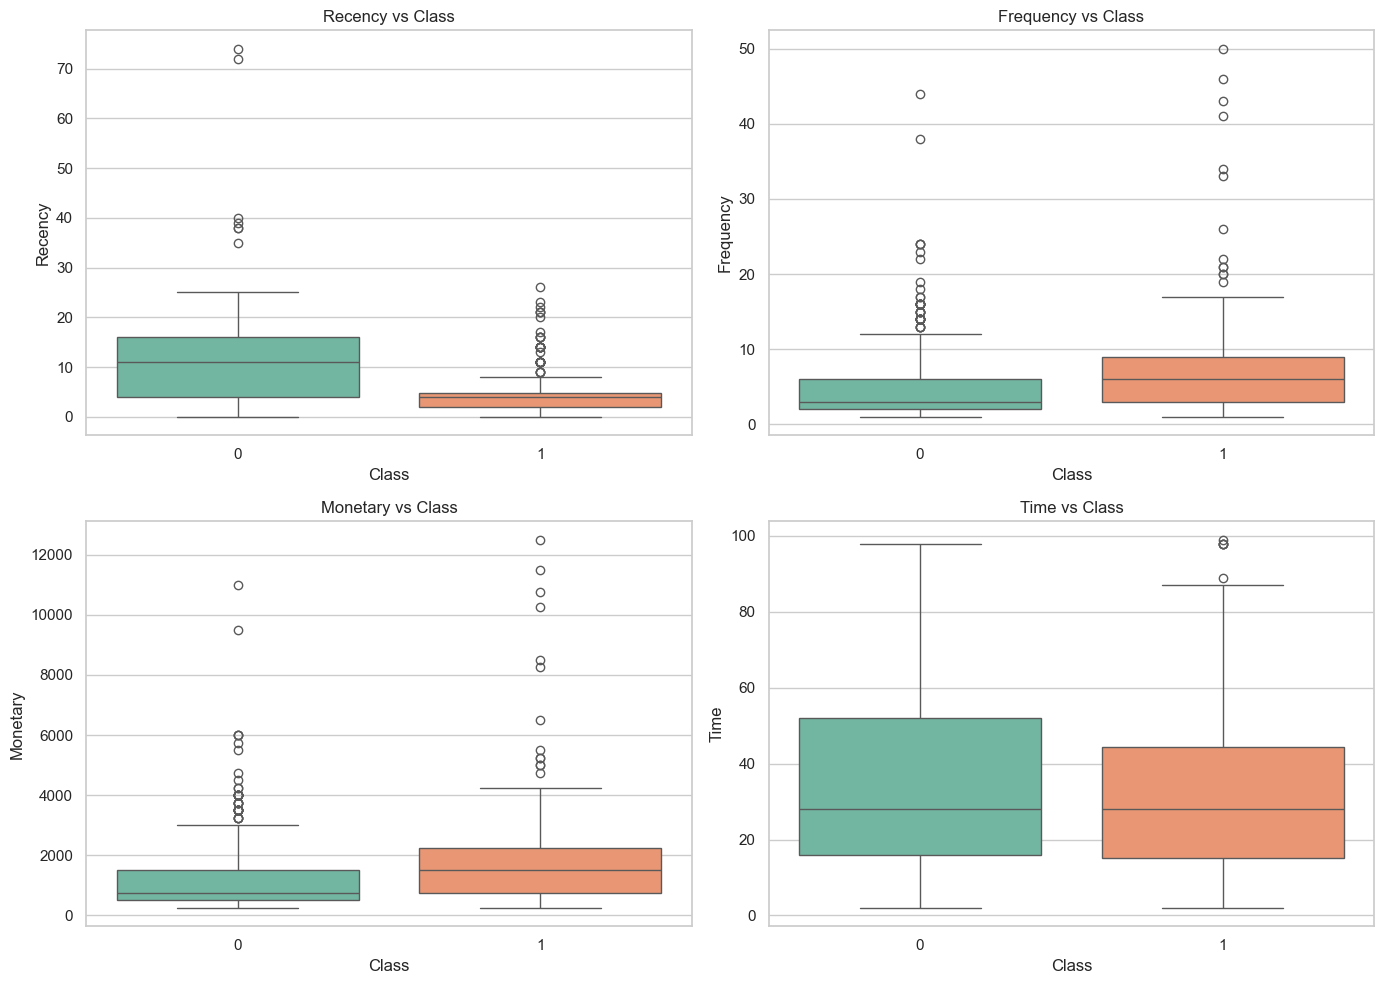

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a general style for plots
sns.set(style="whitegrid")

# Visualize distributions of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
columns = ["Recency", "Frequency", "Monetary", "Time"]
for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribution of {columns[i]}")
    ax.set_xlabel(columns[i])

plt.tight_layout()
plt.show()

# Visualize the relationship between each feature and the target variable (Class)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data=df, x="Class", y=columns[i], ax=ax, palette="Set2")
    ax.set_title(f"{columns[i]} vs Class")
    ax.set_xlabel("Class")
    ax.set_ylabel(columns[i])

plt.tight_layout()
plt.show()


In [18]:

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [19]:

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model's performance
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

report, roc_auc




('              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85       114\n           1       0.52      0.47      0.49        36\n\n    accuracy                           0.77       150\n   macro avg       0.68      0.67      0.67       150\nweighted avg       0.76      0.77      0.76       150\n',
 np.float64(0.7080896686159843))